In [1]:
import cdt
from cdt.causality.graph import SAM
import networkx as nx
import notears
import matplotlib.pyplot as plt

Detecting 1 CUDA device(s).


In [2]:
data, graph = cdt.data.load_dataset("sachs")
adj = nx.to_numpy_array(graph)

In [3]:
obj = SAM()
output = obj.predict(data)

100%|██████████| 4000/4000 [04:37<00:00, 14.43it/s, disc=-.13, gen=-1.02, regul_loss=0.0375, tot=-11.1]   


In [4]:
learned_graph = nx.to_numpy_array(output)

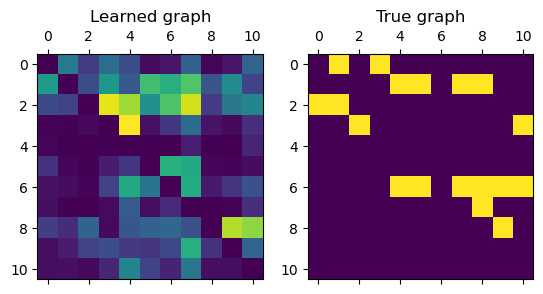

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].matshow(learned_graph)
ax[0].set_title("Learned graph")
# ax[0].colorbar()

ax[1].matshow(adj)
ax[1].set_title("True graph")
# plt.colorbar()
plt.show()

In [7]:
from notears.notears.utils import threshold_output

acyclic_W = threshold_output(learned_graph)

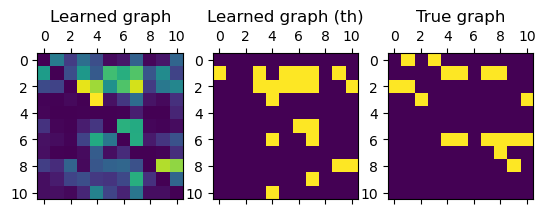

In [8]:
fig, ax = plt.subplots(1, 3)

ax[0].matshow(learned_graph)
ax[0].set_title("Learned graph")

ax[1].matshow(acyclic_W)
ax[1].set_title("Learned graph (th)")
# ax[1].colorbar()

ax[2].matshow(adj)
ax[2].set_title("True graph")
# plt.colorbar()

plt.show()

In [9]:
cs = notears.notears.utils.compare_graphs_undirected(adj, acyclic_W)
print('True positives: {}\nFalse positives: {}\nTrue negatives: {}\nFalse negatives: {}'\
      .format(cs[0], cs[1], cs[2], cs[3]))

print("Precision: {}\nRecall: {}\n Specificity: {}".format(notears.notears.utils.compare_graphs_precision(cs), notears.notears.utils.compare_graphs_recall(cs), notears.notears.utils.compare_graphs_specificity(cs)))
print("")

True positives: 8
False positives: 13
True negatives: 90
False negatives: 10
Precision: 0.38095238095238093
Recall: 0.4444444444444444
 Specificity: 0.8737864077669902



In [10]:
cdt.metrics.SHD(adj, acyclic_W)

29.0

In [12]:
import numpy as np
np.sum(adj != acyclic_W)

29